In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

x = iris.data

iris_data = pd.DataFrame(x, columns = iris.feature_names)


In [3]:
y = iris.target    ##Seems like there are 3 different categories in our dataset
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
print(iris.target_names)    ##Names of the categories

['setosa' 'versicolor' 'virginica']


*Splitting the dataset into training and testing (80% training , 20% testing)*

In [6]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

*Training the Decision Tree Algorithm*

In [7]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier()
Classifier.fit(x_train, y_train)

DecisionTreeClassifier()

*Visualising Decision Tree*

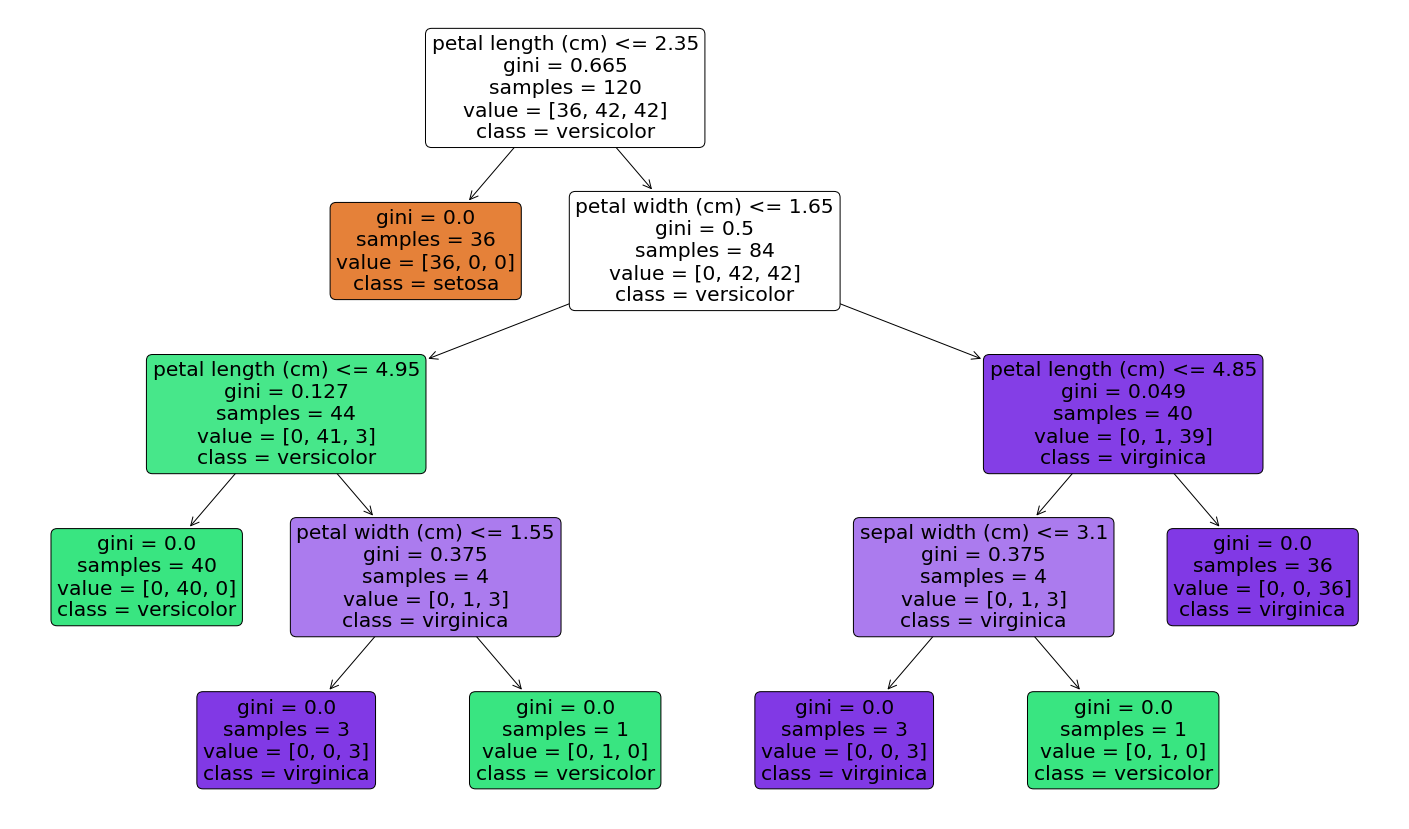

In [8]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize = (25,15))
_=plot_tree(Classifier, feature_names = iris.feature_names, class_names=iris.target_names, filled = True, rounded = True)
plt.show(_)

fig.savefig('DecisionTreeGraph.png')

*Making the prediction*

In [10]:
y_pred = Classifier.predict(x_test)
y_pred

array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [11]:
##Assigning the names to the targets in the dataset
y_test = iris.target_names[y_test]
y_pred = iris.target_names[y_pred]

df = pd.DataFrame(np.column_stack((x_test, y_test, y_pred)), columns = iris.feature_names + ['Actual Class', 'Predicted Class'])

def highlight(s, column):
    if s['Actual Class'] == s['Predicted Class']:
        return ['background-color: yellow']*6
    else:
        return ['background-color: lightblue']*6
    
df.style.apply(highlight, column=['Actual Class', 'Predicted Class'], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Actual Class,Predicted Class
0,4.6,3.4,1.4,0.3,setosa,setosa
1,4.6,3.1,1.5,0.2,setosa,setosa
2,5.7,2.5,5.0,2.0,virginica,virginica
3,4.8,3.0,1.4,0.1,setosa,setosa
4,4.8,3.4,1.9,0.2,setosa,setosa
5,7.2,3.0,5.8,1.6,virginica,versicolor
6,5.0,3.0,1.6,0.2,setosa,setosa
7,6.7,2.5,5.8,1.8,virginica,virginica
8,6.4,2.8,5.6,2.1,virginica,virginica
9,4.8,3.0,1.4,0.3,setosa,setosa


*Checking the accuracy*

In [12]:
from sklearn import metrics
print("Accuracy= ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9333333333333333


Hence the Classiication Rate is  93.33%